#**Roads Accidents Analysis / Case of Bogota - Colombia / Year 2017-2018 & 2020-2021**

###**Authors**









*   Grace Tumusanganire (al426582@uji.es)
*   Laura Milena Muñoz Amaya (al427259@uji.es)
*   Jean de Dieu Rurangwa (al427298@uji.es)










###**Abstract**

Road accidents injuries has been for so many years among the leading cause of death worldwide, and the leading cause in young people. The UN has taken preventive measures to decrease the rate of death caused by road injuries through SDG goals specifically goal 3 and goal 11.

This study aims at analyzing the progress of the strategies vis-a-vis the target, by comparatively analyzing the number of recorded accidents between the years 2017-2018 and 2020-2021 in the city of Bogota in Colombia as one of the upper-middle income countries that are the most affected by road injuries.

The analysis is done with pandas and geopandas library for spatial analysis and interactive views with Folium of Leaflet library. The results shows that there have been a consistent decrease in the number of recorded road accidents.

###**KeyWords**

Bogota; Colombia; Road accidents; Heat Map; UN-WHO(SDGs)

###**SDG Goals**








Goal 3: Ensure healthy lives and promote well-being for all at all ages.

> Specific target :3.6. Road traffic injuries (Reduction of road fatalities by 2020)

Goal 11: Make cities and human settlements inclusive, safe, resilient and sustainable.



> Specific target:11.2. Urban road safety (Provide access to safe, affordable, accessible and sustainable transport systems for all by 2030)

###**Introduction**







Road accidents injury is among the top 10 leading causes of death world wide, the leading cause of death among young people, and the main cause of death among young people aged 15 to 29 years especially in lower and upper-middle income countries since 2000 till 2019 as reported by UN-World Health Organization.

The UN study showed that in 2016, road fatalities have increased globally to 1.35 millions and over 50 million people are injured every year around the world, hence currently ranking the 8th leading cause of death worldwide across all age groups and predicted to become the 7th leading cause of death by 2030. 

This therefore, led to the adoption of strategies to reduce and prevent as much as possible road traffic injuries and deaths through the 3rd and 11th SGD goals to ensure road and traffic safety. The target is to halve the number of global deaths and injuries from roads traffic accidents by 2030 and eventually reach the common final goal of 0 fatalities and injuries.

As group 8, our motivation to do this study is to analyse whether there is any progress towards the reduction of road accidents in regard to the SDG 3 and 11 targets. The target users are the traffic police of Bogota-Colombia, and UN-World Health Organization (WHO). 

The expected benefits from this study for the traffic police department of Bogotá-Colombia is to track the results of an approach known as **`Vision Zero`** to tackle road safety. For UN-WHO, the expected benefit would be comparative analysis that shows the progress from different action plans towards the achievement of SDG 3 and 11. 

###**Data used**

**Dataset**

Accidents data as a table in Microsoft excel format (.xlsx)

Bogota localities as polygons in ESRI Shapefile format



> **src: https://datosabiertos.bogota.gov.co/**



**Most relevant columns**

Accidents dataset: total accidents 2017, total accidents 2020, Locality_n (name of locality), Locality_c (code of locality), Total death, Total injured, Total unharmed, Mode of transport.

Bogota localities: Locality_c, Locality_n

###**Python libraries used**

In [248]:
!pip install seaborn --upgrade
###### Geopandas dependencies
!sudo apt install libspatialindex-dev  ## superuser permissions
!pip install geopandas
!pip install descartes # For visualizations
# Fiona dependences 
!pip install Fiona==1.8.4  #Fiona for upload geojson file
!apt-get install ca-certificates
!pip install pysal==1.14.4.post2
!pip install mapclassify==2.0.1
##  Dependences FOLIUM
!pip install folium

!pip install vincent ## Vicent and Graphics into popups

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ca-certificates is already the newest version (20211016ubuntu0.18.04.1).
The following package was automatically installed and is no longer require

In [249]:
# Pandas Library
import numpy as np
import pandas as pd
# MATPLOTLIB Library
import matplotlib.pyplot as plt
#### LIBRERIAS SEABORN
import seaborn as sns
## Library Instalation (Map)
import folium ,json
import branca.colormap as cm  ##It is used to help us put HTML in the bookmark popups. Without it we can only see plain text.
from folium.plugins import FastMarkerCluster   ## plugins 
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import branca.colormap as cm
import seaborn as sns
###############   Heat Map Library  ##########
import os
import geopandas as gpd
import IPython.display as display
#import ogr                           # GDAL/OGR
import shapely                       #Tools for geometric manipulation
from shapely.geometry import *
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import vincent ## Graphics in popups (dynamic map)
from folium.plugins import Search
%matplotlib inline

### **Data Preprocessing**

In [250]:
bogota= gpd.read_file('/content/bogota_localities.geojson')
accident_2017 = pd.read_excel('/content/Accidents.xlsx') 
accidents_2020 = gpd.read_file('/content/New_Accidents_data.csv')

In [251]:
#preprocessing dataset of accident_2020
accidents_2020.head()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,geometry
0,4401419,02/01/2015,13:00:00,2,4,,,AV AVENIDA BOYACA-CL 49A 76,6,1,None
1,4401420,01/01/2015,13:00:00,3,1,1,,KR 17A-CL 63B 02,19,1,None
2,4401421,02/01/2015,11:15:00,2,2,,,AV AVENIDA CIUDAD DE CALI-CL 8A 13,8,1,None
3,4401422,02/01/2015,21:30:00,2,1,1,,KR 107-CL 79B 41,10,1,None
4,4401423,01/01/2015,09:45:00,2,1,1,,CL 66A-KR 76 02,10,2,None


In [252]:
accidents_2020.shape

(196152, 11)

In [253]:
accidents_2020.columns.values

array(['CODIGO_ACCIDENTE', 'FECHA', 'HORA', 'GRAVEDAD', 'CLASE', 'CHOQUE',
       'OBJETO_FIJO', 'DIRECCION', 'CODIGO_LOCALIDAD', 'DISENO_LUGAR',
       'geometry'], dtype=object)

In [254]:
accidents_2020.tail()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,geometry
196147,10535634,05/12/2020,05:59:00,2,1,1,,KR 27 - CL 1 F 02,14,2,None
196148,10535764,16/09/2020,16:45:00,2,1,1,,KR 14 - CL 77 02,5,1,None
196149,10535836,02/11/2020,12:00:00,2,1,1,,CL 167 - KR 54 D 35,11,1,None
196150,10536544,13/01/2020,09:40:00,2,2,,,AV AVENIDA CARACAS- CL 27 02,18,1,None
196151,10537008,06/06/2020,02:31:00,2,2,,,AV AVENIDA BOYACA- DG 47 A 02,6,1,None


In [255]:
accidents_2020.dtypes

CODIGO_ACCIDENTE      object
FECHA                 object
HORA                  object
GRAVEDAD              object
CLASE                 object
CHOQUE                object
OBJETO_FIJO           object
DIRECCION             object
CODIGO_LOCALIDAD      object
DISENO_LUGAR          object
geometry            geometry
dtype: object

In [256]:
accidents_2020.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   CODIGO_ACCIDENTE  196152 non-null  object  
 1   FECHA             196152 non-null  object  
 2   HORA              196152 non-null  object  
 3   GRAVEDAD          196152 non-null  object  
 4   CLASE             196152 non-null  object  
 5   CHOQUE            196152 non-null  object  
 6   OBJETO_FIJO       196152 non-null  object  
 7   DIRECCION         196152 non-null  object  
 8   CODIGO_LOCALIDAD  196152 non-null  object  
 9   DISENO_LUGAR      196152 non-null  object  
 10  geometry          0 non-null       geometry
dtypes: geometry(1), object(10)
memory usage: 16.5+ MB


In [257]:
# preprocessing the dataset of bogota
bogota.head()

,FID,Locality_n,Locality_c,geometry
0,0,Antonio Nariño,15,"POLYGON ((-74.13075 4.59335, -74.13075 4.59335..."
1,1,Tunjuelito,6,"POLYGON ((-74.13777 4.59489, -74.14043 4.59536..."
2,2,Rafael Uribe Uribe,18,"POLYGON ((-74.12803 4.59254, -74.12829 4.59265..."
3,3,La Candelaria,17,"POLYGON ((-74.06621 4.60317, -74.06621 4.60317..."
4,4,Barrios Unidos,12,"POLYGON ((-74.05725 4.68684, -74.05725 4.68684..."


In [258]:
bogota.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

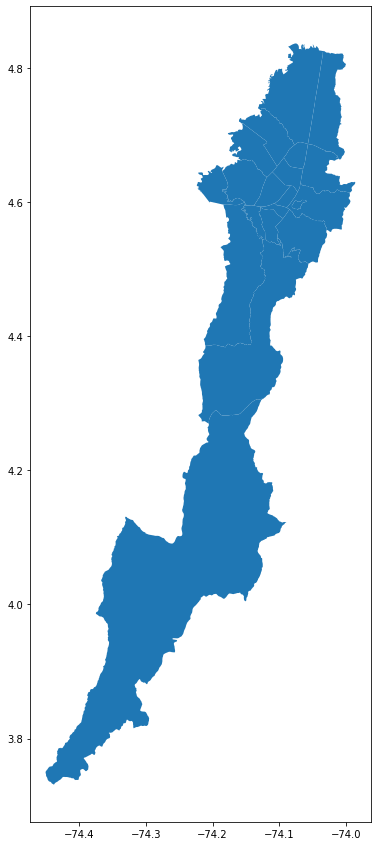

In [259]:
bogota.plot(figsize=(7, 15))

In [260]:
# selecting data colllected in 2017 and 2020

accidents_2020["Time"] = accidents_2020["FECHA"].astype(str)
accidents_2020.tail()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,geometry,Time
196147,10535634,05/12/2020,05:59:00,2,1,1,,KR 27 - CL 1 F 02,14,2,None,05/12/2020
196148,10535764,16/09/2020,16:45:00,2,1,1,,KR 14 - CL 77 02,5,1,None,16/09/2020
196149,10535836,02/11/2020,12:00:00,2,1,1,,CL 167 - KR 54 D 35,11,1,None,02/11/2020
196150,10536544,13/01/2020,09:40:00,2,2,,,AV AVENIDA CARACAS- CL 27 02,18,1,None,13/01/2020
196151,10537008,06/06/2020,02:31:00,2,2,,,AV AVENIDA BOYACA- DG 47 A 02,6,1,None,06/06/2020


In [261]:
accidents_2020["Year"]= accidents_2020["Time"].str.slice(start=6, stop=10)
accidents_2020.head()

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,geometry,Time,Year
0,4401419,02/01/2015,13:00:00,2,4,,,AV AVENIDA BOYACA-CL 49A 76,6,1,None,02/01/2015,2015
1,4401420,01/01/2015,13:00:00,3,1,1,,KR 17A-CL 63B 02,19,1,None,01/01/2015,2015
2,4401421,02/01/2015,11:15:00,2,2,,,AV AVENIDA CIUDAD DE CALI-CL 8A 13,8,1,None,02/01/2015,2015
3,4401422,02/01/2015,21:30:00,2,1,1,,KR 107-CL 79B 41,10,1,None,02/01/2015,2015
4,4401423,01/01/2015,09:45:00,2,1,1,,CL 66A-KR 76 02,10,2,None,01/01/2015,2015


In [262]:
# selecting only rows that matters
accidents_2020[["CODIGO_ACCIDENTE", "CODIGO_LOCALIDAD", "Year"]].head()

,CODIGO_ACCIDENTE,CODIGO_LOCALIDAD,Year
0,4401419,6,2015
1,4401420,19,2015
2,4401421,8,2015
3,4401422,10,2015
4,4401423,10,2015


In [263]:
accidents_2020= accidents_2020[["CODIGO_ACCIDENTE", "CODIGO_LOCALIDAD", "Year"]]
accidents_2020.tail()

,CODIGO_ACCIDENTE,CODIGO_LOCALIDAD,Year
196147,10535634,14,2020
196148,10535764,5,2020
196149,10535836,11,2020
196150,10536544,18,2020
196151,10537008,6,2020


In [264]:
accidents_2020['YEAR']= accidents_2020['Year'].astype(int)

<ipython-input-264-d40bb9b4b98f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_2020['YEAR']= accidents_2020['Year'].astype(int)


In [265]:
condition_2020 = accidents_2020['YEAR']>2019
New_accidents= accidents_2020.loc[condition_2020]
New_accidents.tail()

,CODIGO_ACCIDENTE,CODIGO_LOCALIDAD,Year,YEAR
196147,10535634,14,2020,2020
196148,10535764,5,2020,2020
196149,10535836,11,2020,2020
196150,10536544,18,2020,2020
196151,10537008,6,2020,2020


In [266]:
New_accidents.head()

,CODIGO_ACCIDENTE,CODIGO_LOCALIDAD,Year,YEAR
173431,10507453,5,2020,2020
173432,10507454,4,2020,2020
173433,10507455,8,2020,2020
173434,10507456,5,2020,2020
173435,10507457,7,2020,2020


In [267]:
New_accidents= New_accidents[['CODIGO_ACCIDENTE', 'CODIGO_LOCALIDAD', 'YEAR']]
New_accidents.head()

,CODIGO_ACCIDENTE,CODIGO_LOCALIDAD,YEAR
173431,10507453,5,2020
173432,10507454,4,2020
173433,10507455,8,2020
173434,10507456,5,2020
173435,10507457,7,2020


In [268]:
New_accidents.rename(columns={"CODIGO_ACCIDENTE": "Accident_code", "CODIGO_LOCALIDAD": "Locality_code", "YEAR": "Year"}, inplace = True)

In [269]:
New_accidents.head()

,Accident_code,Locality_code,Year
173431,10507453,5,2020
173432,10507454,4,2020
173433,10507455,8,2020
173434,10507456,5,2020
173435,10507457,7,2020


In [270]:
# check number of localities
New_accidents['Locality_code'].nunique()

20

In [271]:
accidents_per_locality_2020= New_accidents.groupby(['Locality_code','Year'], as_index=False).count()

In [272]:
accidents_per_locality_2020.rename(columns={'Accident_code':'Total_accidents_2020'},inplace = True )

In [273]:
accidents_per_locality_2020.head()

,Locality_code,Year,Total_accidents_2020
0,1,2020,1910
1,10,2020,2150
2,11,2020,2064
3,12,2020,1005
4,13,2020,958


In [274]:
## define output filename
output_file = "accidents_per_locality_in_2020.csv"

# Save dataframe to csv
accidents_per_locality_2020.to_csv(output_file, sep=",", index = False, float_format="%.2f")


In [275]:
accidents_per_locality_2020 = accidents_per_locality_2020.astype({'Locality_code' : np.int64})

In [276]:
# merging the two datasets bogota with geometries with accidents based on the locality code
bogota_with_accidents= bogota.merge(accidents_per_locality_2020, left_on='Locality_c', right_on='Locality_code')

In [277]:
bogota_with_accidents

,FID,Locality_n,Locality_c,geometry,Locality_code,Year,Total_accidents_2020
0,0,Antonio Nariño,15,"POLYGON ((-74.13075 4.59335, -74.13075 4.59335...",15,2020,551
1,1,Tunjuelito,6,"POLYGON ((-74.13777 4.59489, -74.14043 4.59536...",6,2020,793
2,2,Rafael Uribe Uribe,18,"POLYGON ((-74.12803 4.59254, -74.12829 4.59265...",18,2020,722
3,3,La Candelaria,17,"POLYGON ((-74.06621 4.60317, -74.06621 4.60317...",17,2020,102
4,4,Barrios Unidos,12,"POLYGON ((-74.05725 4.68684, -74.05725 4.68684...",12,2020,1005
5,5,Teusaquillo,13,"POLYGON ((-74.09372 4.66607, -74.10342 4.65351...",13,2020,958
6,6,Puente Aranda,16,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727...",16,2020,1793
7,7,Los Mártires,14,"POLYGON ((-74.07283 4.61542, -74.07296 4.61558...",14,2020,720
8,8,Sumapaz,20,"POLYGON ((-74.20584 4.26966, -74.20567 4.26952...",20,2020,2
9,9,Usaquén,1,"POLYGON ((-74.01116 4.66459, -74.01094 4.66457...",1,2020,1910


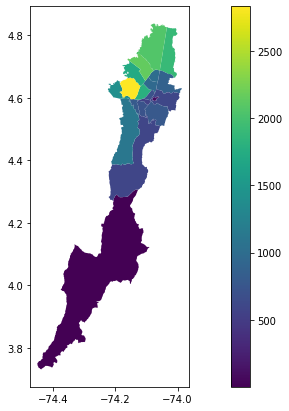

In [278]:
# plot
bogota_with_accidents.plot(column='Total_accidents_2020', legend=True, figsize=(15, 7))

In [279]:
# preprocessing dataset 0f accident_2017
accident_2017.head()

,INDICE,CODIGO_SINIESTRO,FECHA,DIA MES,DIA SEMANA,MES,ANIO,HORA,MINUTOS,GRAVEDAD,...,SEXO_ACTOR_1,ACTOR_VIAL_2,ESTADO_ACTOR_2,EDAD_ACTOR_2,SEXO_ACTOR_2,ACTOR_VIAL_3,ESTADO_ACTOR_3,EDAD_ACTOR_3,SEXO_ACTOR_3,INCLUYE_PASAJERO
0,1,4469193,2017-01-04,4,miércoles,enero,2017,4,30,Con Heridos,...,MASCULINO,MOTOCICLISTA,HERIDO,25.0,MASCULINO,NaN,NaN,NaN,NaN,NO
1,2,4469220,2017-01-01,1,domingo,enero,2017,21,50,Solo Daños,...,FEMENINO,CONDUCTOR,ILESO,48.0,SIN INFORMACION,NaN,NaN,NaN,NaN,NO
2,3,4469225,2017-01-04,4,miércoles,enero,2017,7,14,Solo Daños,...,FEMENINO,MOTOCICLISTA,ILESO,22.0,MASCULINO,NaN,NaN,NaN,NaN,NO
3,4,4469250,2017-01-04,4,miércoles,enero,2017,16,0,Solo Daños,...,MASCULINO,CONDUCTOR,ILESO,38.0,MASCULINO,NaN,NaN,NaN,NaN,MASCULINO
4,5,4469259,2017-01-03,3,martes,enero,2017,15,18,Con Heridos,...,MASCULINO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMENINO


In [280]:
accident_2017.shape

(72042, 43)

In [281]:
accident_2017.columns.values

array(['INDICE', 'CODIGO_SINIESTRO', 'FECHA', 'DIA MES', 'DIA SEMANA',
       'MES', 'ANIO', 'HORA', 'MINUTOS', 'GRAVEDAD', 'TIPO DE ACCIDENTE',
       'CHOQUE_CON', 'OBJETO_FIJO', 'TOTAL_MUERTOS', 'TOTAL_HERIDOS',
       'TOTAL_ILESOS', 'LOCALIDAD', 'DISENO_LUGAR', 'VEHICULO_1',
       'MODO_TRANSPORTE_1', 'SERVICIO_1', 'VEH_ENFUGA_1', 'VEHICULO_2',
       'MODO_TRANSPORTE_2', 'SERVICIO_2', 'VEH_ENFUGA_2', 'VEHICULO_3',
       'MODO_TRANSPORTE_3', 'SERVICIO_3', 'VEH_ENFUGA_3', 'ACTOR_VIAL_1',
       'ESTADO_ACTOR_1', 'EDAD_ACTOR_1', 'SEXO_ACTOR_1', 'ACTOR_VIAL_2',
       'ESTADO_ACTOR_2', 'EDAD_ACTOR_2', 'SEXO_ACTOR_2', 'ACTOR_VIAL_3',
       'ESTADO_ACTOR_3', 'EDAD_ACTOR_3', 'SEXO_ACTOR_3',
       'INCLUYE_PASAJERO'], dtype=object)

In [282]:
accident_2017= accident_2017[['TIPO DE ACCIDENTE', 'LOCALIDAD','TOTAL_MUERTOS', 'TOTAL_HERIDOS', 'TOTAL_ILESOS', 'MODO_TRANSPORTE_1', 'EDAD_ACTOR_1']]

In [283]:
accident_2017.rename(columns={"TIPO DE ACCIDENTE": "Type of accident", "LOCALIDAD": "Locality", "TOTAL_MUERTOS": "Total Death", "TOTAL_HERIDOS": "Total Unharmed", "TOTAL_ILESOS": "Total Injured","MODO_TRANSPORTE_1": "Mode of Transport", "EDAD_ACTOR_1": "Age"}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [284]:
accident_2017.head()

,Type of accident,Locality,Total Death,Total Unharmed,Total Injured,Mode of Transport,Age
0,Choque,Antonio Nariño,0,1,1,Automovil,36.0
1,Choque,Antonio Nariño,0,0,2,Automovil,28.0
2,Choque,Antonio Nariño,0,0,2,Automovil,50.0
3,Choque,Antonio Nariño,0,0,2,Automovil,73.0
4,Caida de ocupante,Antonio Nariño,0,1,1,Bus,51.0


In [285]:
accident_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72042 entries, 0 to 72041
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type of accident   72042 non-null  object 
 1   Locality           72042 non-null  object 
 2   Total Death        72042 non-null  int64  
 3   Total Unharmed     72042 non-null  int64  
 4   Total Injured      72042 non-null  int64  
 5   Mode of Transport  71928 non-null  object 
 6   Age                71070 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.8+ MB


In [286]:
accidents_per_locality_2017= accident_2017.groupby(['Locality'], as_index=False).count()

In [287]:
accidents_per_locality_2017.head()

,Locality,Type of accident,Total Death,Total Unharmed,Total Injured,Mode of Transport,Age
0,Antonio Nariño,1510,1510,1510,1510,1509,1489
1,Barrios Unidos,4086,4086,4086,4086,4074,4041
2,Bosa,3586,3586,3586,3586,3583,3526
3,Chapinero,4149,4149,4149,4149,4139,4110
4,Ciudad Bolívar,2626,2626,2626,2626,2623,2565


In [288]:
accidents_per_locality_2017 = accidents_per_locality_2017[['Locality' ,'Type of accident']]


In [289]:
accidents_per_locality_2017.rename(columns={'Type of accident': 'Total accidents_2017'}, inplace = True )
accidents_per_locality_2017

,Locality,Total accidents_2017
0,Antonio Nariño,1510
1,Barrios Unidos,4086
2,Bosa,3586
3,Chapinero,4149
4,Ciudad Bolívar,2626
5,Engativá,7505
6,Fontibón,5791
7,Kennedy,8110
8,La Candelaria,330
9,Los Mártires,2543


In [290]:
# merging the two datasets bogota with geometries with accidents based on the locality name
bogota_with_accidents= bogota_with_accidents.merge(accidents_per_locality_2017, left_on='Locality_n', right_on='Locality')

In [291]:
bogota_with_accidents.head()

,FID,Locality_n,Locality_c,geometry,Locality_code,Year,Total_accidents_2020,Locality,Total accidents_2017
0,0,Antonio Nariño,15,"POLYGON ((-74.13075 4.59335, -74.13075 4.59335...",15,2020,551,Antonio Nariño,1510
1,1,Tunjuelito,6,"POLYGON ((-74.13777 4.59489, -74.14043 4.59536...",6,2020,793,Tunjuelito,1899
2,2,Rafael Uribe Uribe,18,"POLYGON ((-74.12803 4.59254, -74.12829 4.59265...",18,2020,722,Rafael Uribe Uribe,1698
3,3,La Candelaria,17,"POLYGON ((-74.06621 4.60317, -74.06621 4.60317...",17,2020,102,La Candelaria,330
4,4,Barrios Unidos,12,"POLYGON ((-74.05725 4.68684, -74.05725 4.68684...",12,2020,1005,Barrios Unidos,4086


In [292]:
bogota_with_accidents= bogota_with_accidents[['Locality_n','Locality_c', 'geometry', 'Total_accidents_2020', 'Total accidents_2017']]

In [293]:
bogota_with_accidents.head()

,Locality_n,Locality_c,geometry,Total_accidents_2020,Total accidents_2017
0,Antonio Nariño,15,"POLYGON ((-74.13075 4.59335, -74.13075 4.59335...",551,1510
1,Tunjuelito,6,"POLYGON ((-74.13777 4.59489, -74.14043 4.59536...",793,1899
2,Rafael Uribe Uribe,18,"POLYGON ((-74.12803 4.59254, -74.12829 4.59265...",722,1698
3,La Candelaria,17,"POLYGON ((-74.06621 4.60317, -74.06621 4.60317...",102,330
4,Barrios Unidos,12,"POLYGON ((-74.05725 4.68684, -74.05725 4.68684...",1005,4086


In [294]:
bogota_with_accidents['centroids'] = bogota_with_accidents.centroid

<ipython-input-294-eaf8bcdc8b4a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bogota_with_accidents['centroids'] = bogota_with_accidents.centroid


In [295]:
bogota_pt = bogota_with_accidents[['Locality_n', 'Locality_c', 'Total_accidents_2020', 'Total accidents_2017', 'centroids']]

In [296]:
bogota_pt['lon'] = bogota_pt['centroids'].x
bogota_pt['lat'] = bogota_pt['centroids'].y

In [297]:
bogota_pt.head()

,Locality_n,Locality_c,Total_accidents_2020,Total accidents_2017,centroids,lon,lat
0,Antonio Nariño,15,551,1510,POINT (-74.10284 4.58877),-74.102842,4.588771
1,Tunjuelito,6,793,1899,POINT (-74.13599 4.57484),-74.135989,4.574841
2,Rafael Uribe Uribe,18,722,1698,POINT (-74.11336 4.56648),-74.113363,4.566477
3,La Candelaria,17,102,330,POINT (-74.07207 4.59661),-74.072071,4.596605
4,Barrios Unidos,12,1005,4086,POINT (-74.07355 4.66957),-74.073552,4.669567


### **Data Analysis & visualization**

Mode of transport Vs Type of accident in 2017.

Here we see the kinds of condition(dead, injured and unharmed) for each kinds of transport. 

This is important because we can identify what is the kind of transportation that is more and common involved in the accidents. 

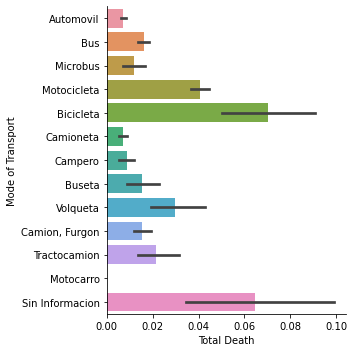

In [309]:
#Bike is the kind of transportation more common in accident road, when people dead
sns.catplot(x='Total Death', y='Mode of Transport', data= accident_2017, kind='bar')

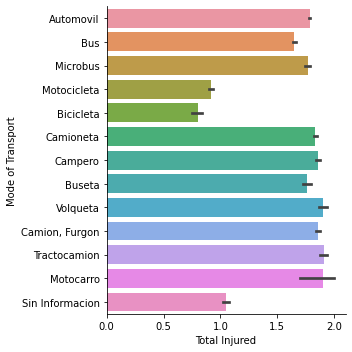

In [310]:
#Oversize transport are the kind of transportation more common in accident road, when people ends unharmed
sns.catplot(x='Total Injured', y='Mode of Transport', data=accident_2017, kind='bar')

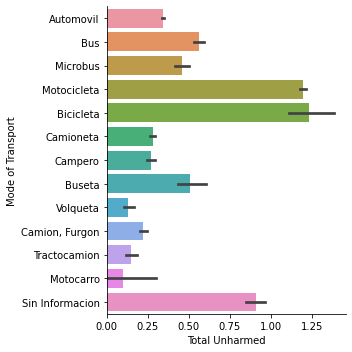

In [311]:
#Unprotected transport are the kind of transportation more common in accident road, when people ends hurt
sns.catplot(x='Total Unharmed', y='Mode of Transport', data=accident_2017, kind='bar')

Spatial Visualization.

Now we want to visualization better what its the locality with the major number of accidents, and in this way understand if exists a relationship with the kind of transportation

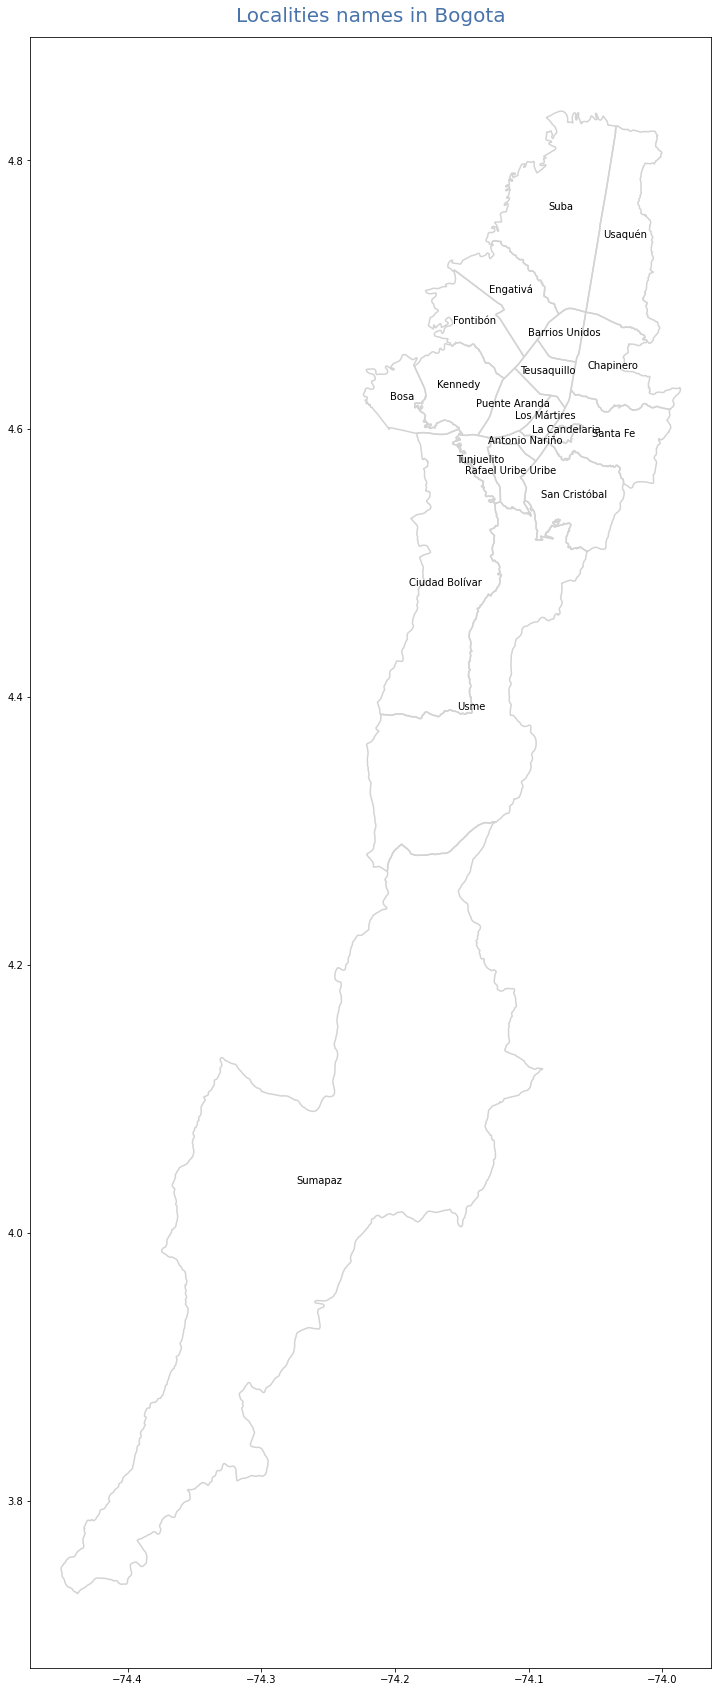

In [312]:
#plot bogota file, we write the title of graph
bogota.boundary.plot(edgecolor="lightgray", linewidth = 1.5, figsize=( 15, 30)).set_title('Localities names in Bogota', 
             pad = 15, 
             fontdict={'fontsize':20, 'color': '#4873ab'})

#Showing the labels:
#We need to create a new column with the center coordinate for each polygon. 
#In this way the label would have a position
bogota['coords'] = bogota['geometry'].apply(lambda x: x.centroid.coords[:])
bogota['coords'] = [coords[0] for coords in bogota['coords']]

#Here it's created the label for each polygon
for idx, row in bogota.iterrows():
    plt.annotate(row['Locality_n'], xy=row['coords'],
                 horizontalalignment='center')

#### ***Heat Map***

This map shows us the locality with more accidents in Bogota City in 2017 and 2020.

The map shows in dark-red color the zones with major numbers of accidents. Which shows Kennedy locality have the major numbers of accidents. 
In the north of the city more accidents occurs.

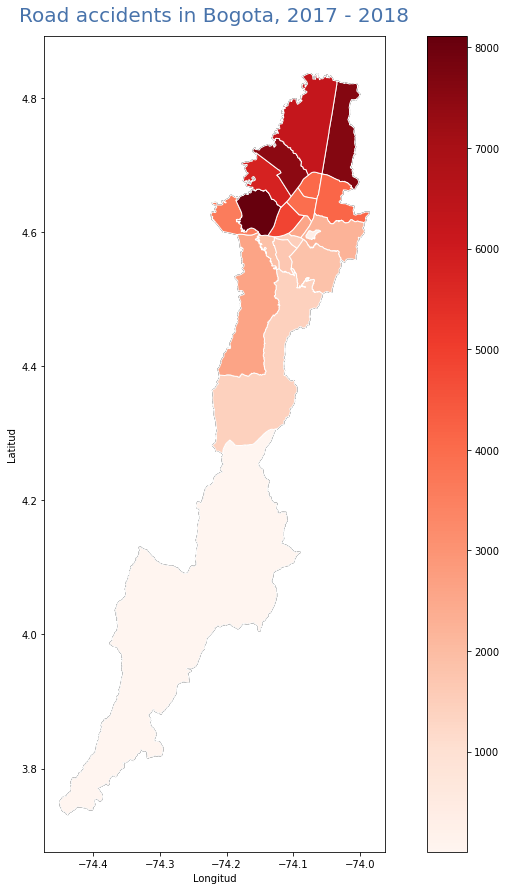

In [313]:
fig, ax = plt.subplots(figsize=( 15, 15))
##Title
ax.set_title('Road accidents in Bogota, 2017 - 2018', 
             pad = 15, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
#x & y axes
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

#Plot heat map
bogota_with_accidents.plot(column='Total accidents_2017', cmap='Reds', linewidth=1, edgecolor='white' ,ax=ax,
              legend=True,  zorder=5)

bogota.plot(ax=ax, edgecolor="black", linewidth = 1)

Now, we see the heat map for 2020 year.. and we look if we have differences

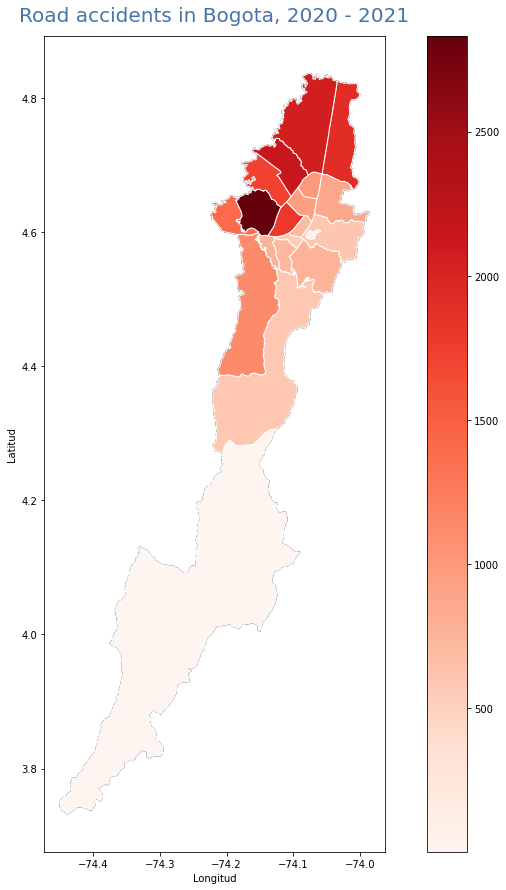

In [314]:
fig, ax = plt.subplots(figsize=( 15, 15))
##Title
ax.set_title('Road accidents in Bogota, 2020 - 2021', 
             pad = 15, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
#x & y axes
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

#Plot heat map
bogota_with_accidents.plot(column='Total_accidents_2020', cmap='Reds', linewidth=1, edgecolor='white' ,ax=ax,
              legend=True,  zorder=5)

bogota.plot(ax=ax, edgecolor="black", linewidth = 1)

#### ***Interactive Maps***

With the interactive Maps we can see a better option the information. 
In this case we can show the number of total accidents in 2017 and 2020

In [315]:
Bogota = (4.624335, -74.063644)
sv_map = folium.Map(location= Bogota,zoom_start=11)
sv_map

In [316]:
##parameter for delevop the markets 
def setPoint(point, icon_color, **kwargs):
  popup_text = ""

  for k,v in kwargs.items():
    popup_text += "{}: {}\n".format(k,v)
  # here ther marker is defined
  folium.Marker(location=point, popup=popup_text, icon=folium.Icon(color=icon_color, icon='cloud')).add_to(sv_map)

In [317]:
Bogota = (4.624335, -74.063644)
sv_map = folium.Map(location= Bogota, zoom_start=11)
#iterate points
for i in list(bogota_pt.index)[:]:
  setPoint(point=(bogota_pt.loc[i, "lat"], bogota_pt.loc[i, "lon"]), icon_color="green",
           Localit = bogota_pt.loc[i,"Locality_n"], Total_Accidents_2017 =bogota_pt.loc[i, "Total accidents_2017"], Total_Accidents_2020 =bogota_pt.loc[i,"Total_accidents_2020"])

In [318]:
citygeo = folium.GeoJson(
    bogota,
    name='LOC').add_to(sv_map)

citysearch = Search(
    layer=citygeo,
    geom_type='Polygon',
    placeholder='Search for a Bogota City',
    collapsed=True,
    search_label='Locality_n'
).add_to(sv_map)

sv_map

Output hidden; open in https://colab.research.google.com to view.

Now. We construct other interactive map for show in with a grapich bar the information about the localities with total of accidents in 2017 and 2020. 

In [319]:
Bogota = (4.624335, -74.063644)
sv_map_1 = folium.Map(location= Bogota,  zoom_start=11)

In [320]:
bar = vincent.GroupedBar(bogota_pt[['Total accidents_2017', 'Total_accidents_2020']] ,width = 700, height = 300)
bar.axis_titles(x='Locality', y='Total')
bar.legend(title= 'Locality')
bar.colors(brew='Set1')

In [321]:

def setPoint(point, icon_color, **kwargs):
  popup_text = folium.Popup()
  folium.Vega(bar, height=350, width=850).add_to(popup_text)
  folium.Marker(location=point, popup=popup_text, icon=folium.Icon(color=icon_color, icon='ok-sign')).add_to(sv_map_1)

In [322]:

for i in list(bogota_pt.index)[:]:
  setPoint(point=(bogota_pt.loc[i, "lat"], bogota_pt.loc[i, "lon"]), icon_color="gray",
           locality = bogota_pt.loc[i,"Locality_n"], Total_Accidents_2017=bogota_pt.loc[i, "Total accidents_2017"], Total_Accidents_2020 =bogota_pt.loc[i,"Total_accidents_2020"])

In [323]:
citygeo = folium.GeoJson(
    bogota,
    name=' LOC').add_to(sv_map_1)

citysearch = Search(
    layer=citygeo,
    geom_type='Polygon',
    placeholder='Search for a Bogota City',
    collapsed=True,
    search_label='Locality_n'
).add_to(sv_map_1)

sv_map_1

Output hidden; open in https://colab.research.google.com to view.

###**Final Reflections**

**Summary**: 

	Kennedy is the locality with the major number of accidents.
	Kennedy is the locality where is the largest market center in the country,
	This means that in this locality there are major number of oversizestransport  (trucks, tractor-trailer.)
	Spatial visualization improve the understanding of the data,
	From 2017 to 2020, the number of road accidents has reduced in Bogota

**Difficulties**:

	Insufficient information (Nature of the data)
	size data (RAM) - Agrupation (Group by) for doing Merge spatial.

**Take-away message**:

	Bogata traffic police department: Vision Zero is being achieved, 
	due to the radical decrease in road accidents in the city of Bogota, 
	but more efforts are needed in the locality of Kennedy

	UN-World Health Organization: SDG 3 and 11 goals will be achieved 
	if other countries put more efforts and adopt supportive strategies 
	to SDG 3 and 11 to minimize road injuries and fatalities. 	

### **References**


https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries

https://www.who.int/news-room/feature-stories/detail/data-for-road-safety-bogot%C3%A1-colombia

MAPFRE, F. (2020). Road Safety and theSDGs. Fundacion MAPFRE. (https://noticias.mapfre.com/media/2020/01/Road-Safety-and-the-SDGs.pdf)